In [1]:
#####
# Author: Byron Stuart
# DSI Project 2
#####

# Do imports and other setup
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

In [2]:
# 1.1 Load the file with the csv module and put it in a Python dictionary
path_to_file = './sat_scores.csv'

header = True
row_list = []

with open(path_to_file, 'rt') as f:
    reader = csv.reader(f)
    for row in reader:
        if header:
            headers = row
            header = False
            for col in row:
                # setup a list within a list for each column
                row_list.append([])
        else:
            for col,head in enumerate(headers):
                # append column value to list
                row_list[col].append(row[col])


sat_dict = {}
for col,head in enumerate(headers):
    # create one dictionary key for each set of column values
    sat_dict[head] = row_list[col]

In [3]:
# 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the
# pandas .read_csv() function
print('Loading from dictionary')
pandas_dict = pd.DataFrame(sat_dict)
print(pandas_dict.dtypes)

print('\nLoading from read_csv')
pandas_read = pd.read_csv(path_to_file)
print(pandas_read.dtypes)

Loading from dictionary
Math      object
Rate      object
State     object
Verbal    object
dtype: object

Loading from read_csv
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


## <font color='blue'>What is the difference between loading from file and inputting this dictionary (if any)?

From the dictionary the numeric values show as "object" because they were read in as
strings and the order of the columns is different.

In [4]:
# 1.3 Look at the first ten rows of the DataFrame: what does our data describe?
print(pandas_read.head(10))
print('\nThe data shows the scores for "Rate", "Verbal" and "Math" on a state by state basis')

  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501

The data shows the scores for "Rate", "Verbal" and "Math" on a state by state basis


In [5]:
# 2. Create a "data dictionary" based on the data

# A data dictionary is an object that describes your data. This should contain the name of
# each variable (column), the type of the variable, your description of what the variable is, 
# and the shape (rows and columns) of the entire dataset.

sat_dict = {}
for col, value in zip(pandas_read.columns.values, pandas_read.dtypes):
    sat_dict[col] = [value, [("State " + col) if col != "State" else "State"]]

sat_dict['Shape'] = {"rows:" : pandas_read.shape[0], "columns:" : pandas_read.shape[1]}
for keys,values in sat_dict.items():
    print(keys, ':', values)

#print(pandas_read.describe())

State : [dtype('O'), ['State']]
Rate : [dtype('int64'), ['State Rate']]
Verbal : [dtype('int64'), ['State Verbal']]
Math : [dtype('int64'), ['State Math']]
Shape : {'rows:': 52, 'columns:': 4}


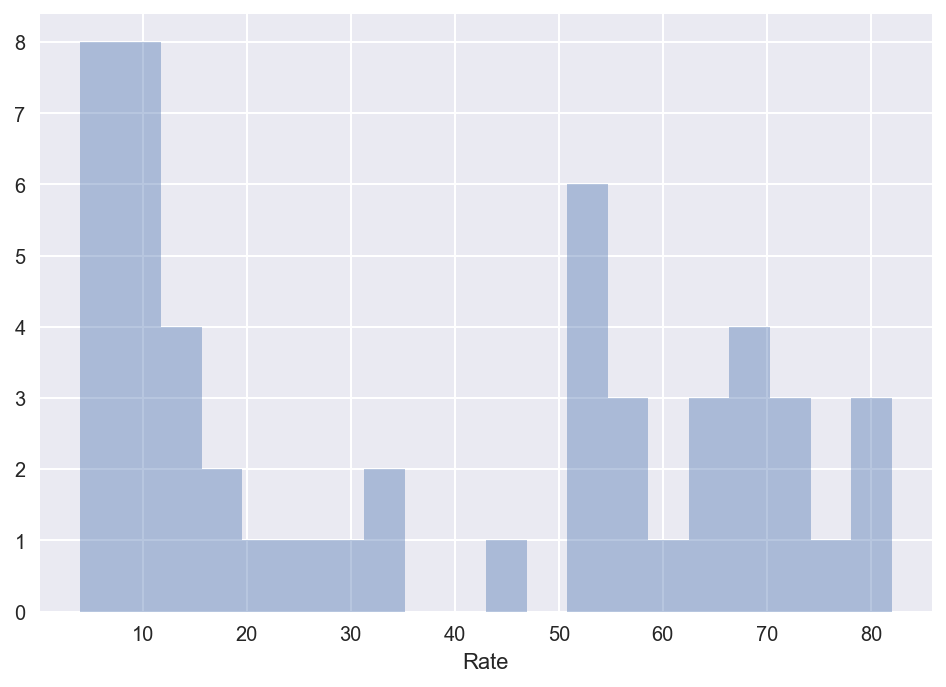

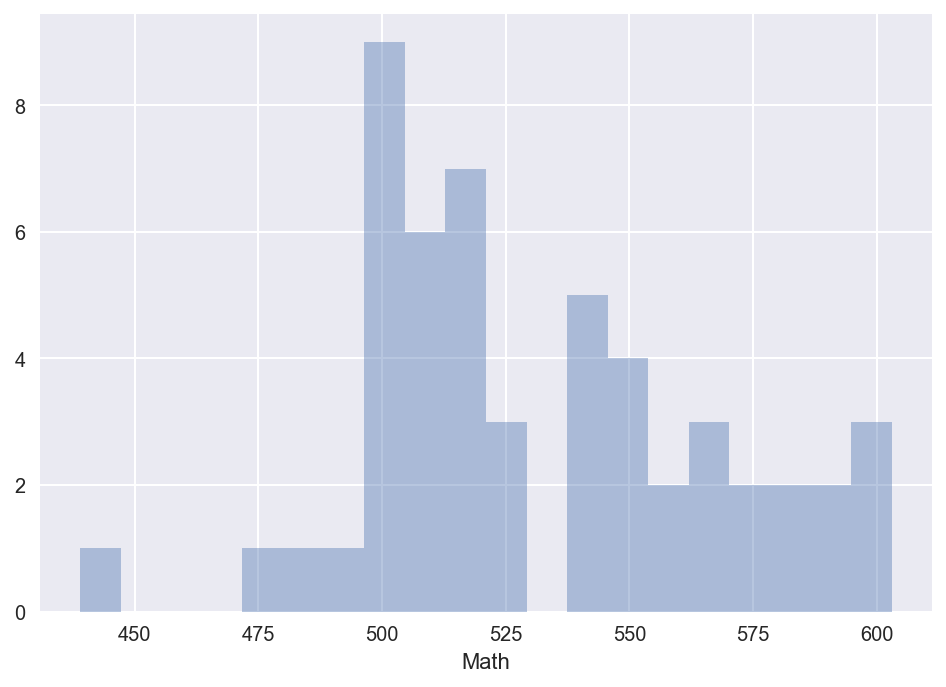

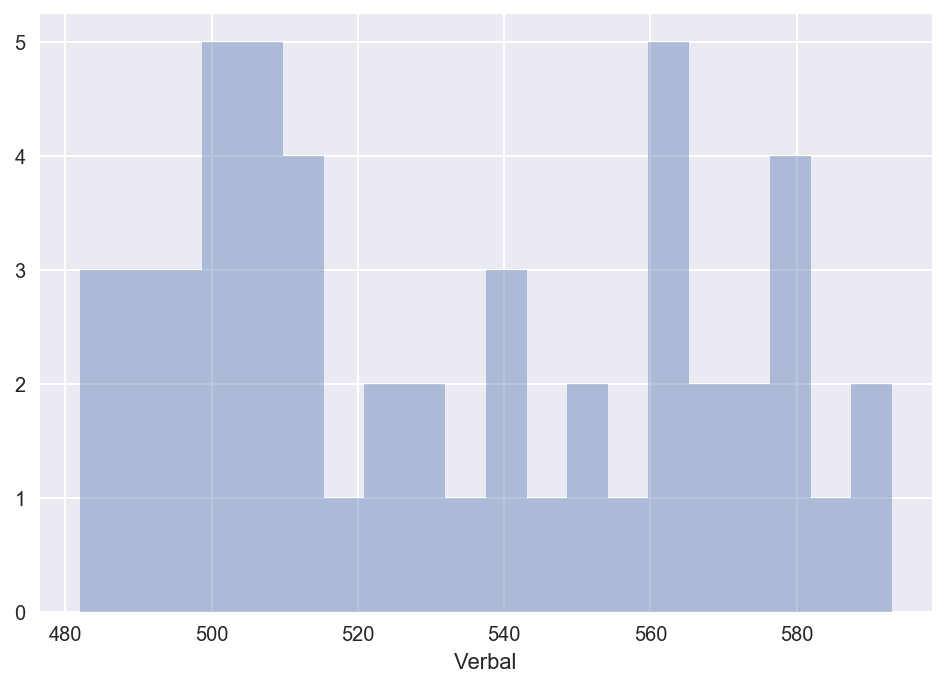

In [6]:
# 3.1 Using seaborn's distplot, plot the distributions for each of Rate, Math, and Verbal
import seaborn as sns
#from scipy.stats import norm
import matplotlib.pyplot as plt
sns.distplot(pandas_read['Rate'], bins=20, kde=False)
plt.show()
sns.distplot(pandas_read['Math'], bins=20, kde=False)
plt.show()
sns.distplot(pandas_read['Verbal'], bins=20, kde=False)
plt.show()

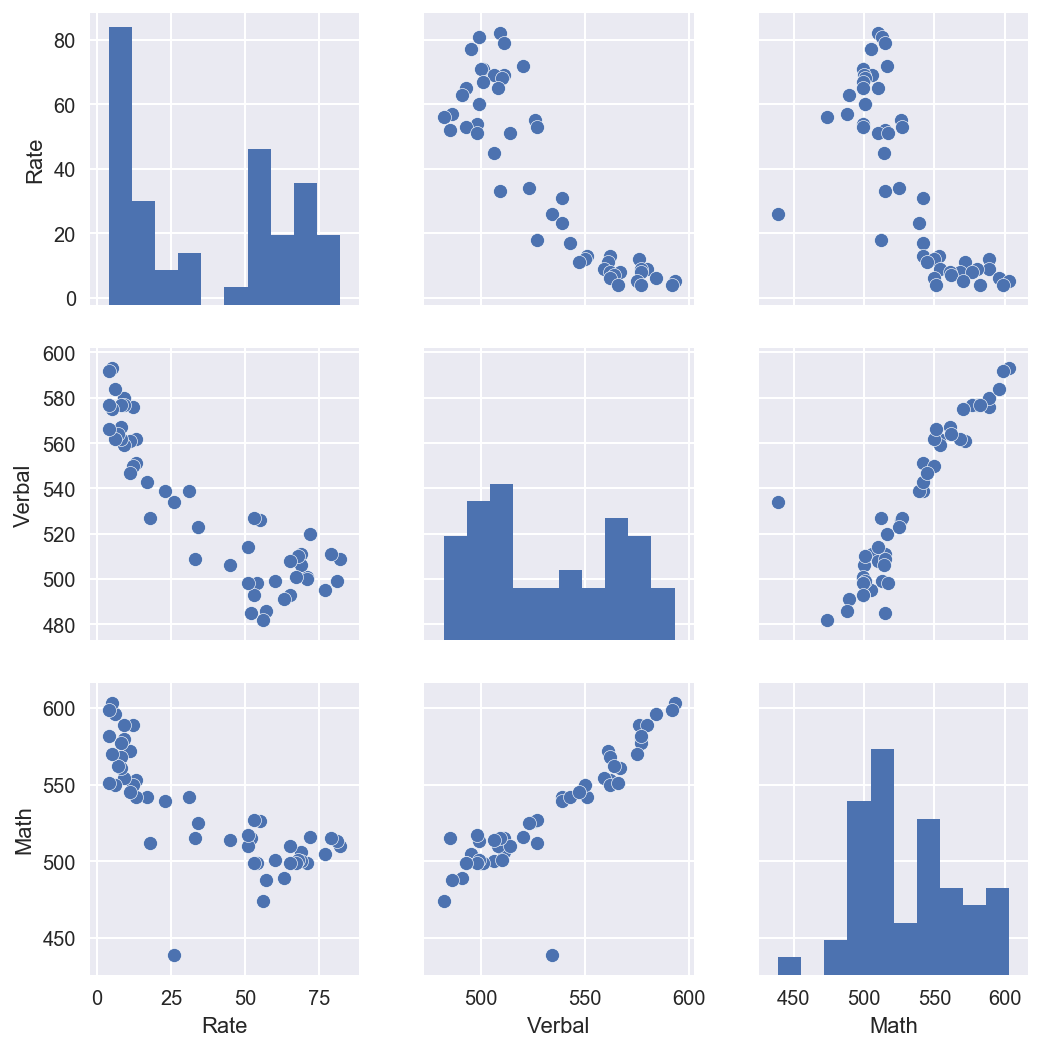

In [7]:
# 3.2 Using seaborn's pairplot, show the joint distributions for each of Rate, Math, and Verbal
sns.pairplot(pandas_read)
plt.show()

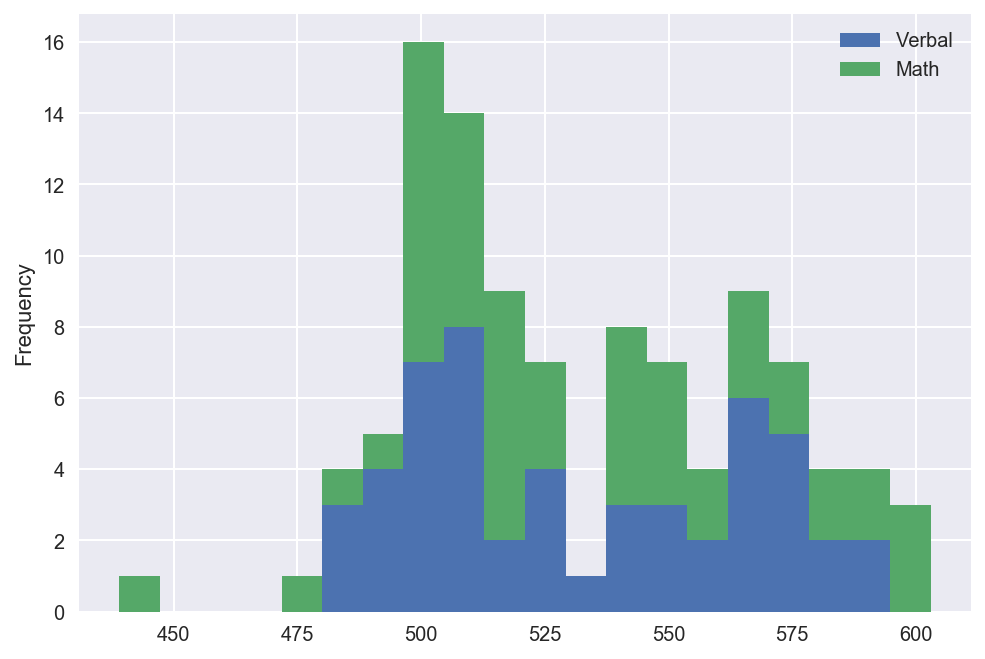

In [8]:
# 4.1 Plot a stacked histogram with Verbal and Math using pandas
verbal_math = pandas_read[['Verbal','Math']]
verbal_math.plot.hist(stacked=True, bins=20)
plt.show()

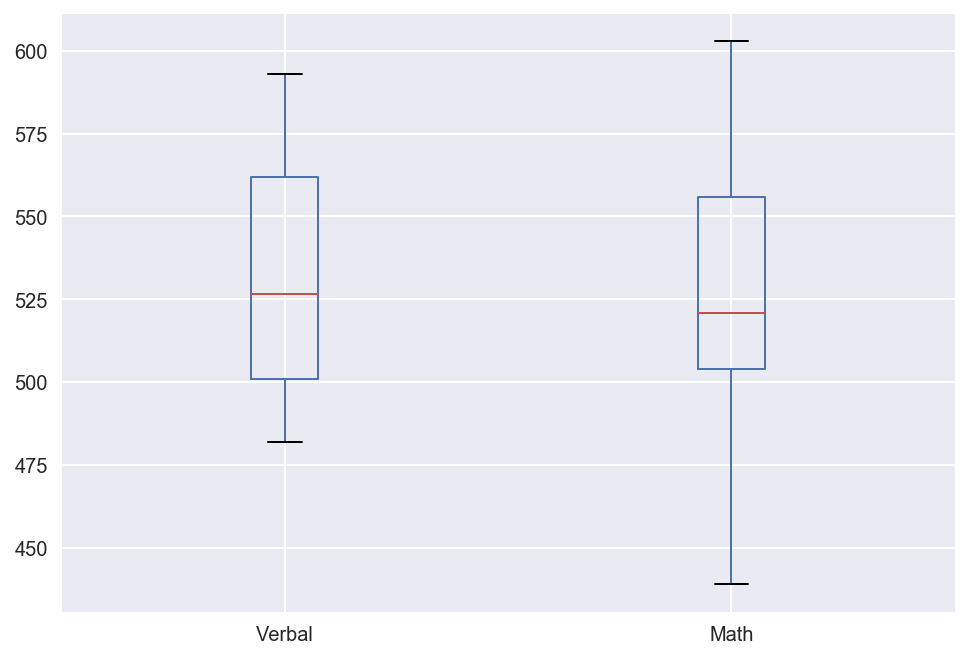

Rate has a completely different scale


In [9]:
# 4.2 Plot Verbal and Math on the same chart using boxplots

# What are the benefits of using a boxplot as compared to a scatterplot or a histogram?
# A boxplot shows the quartiles of the data set in a very clear way

# What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?
verbal_math.plot.box()
plt.show()
print('Rate has a completely different scale')

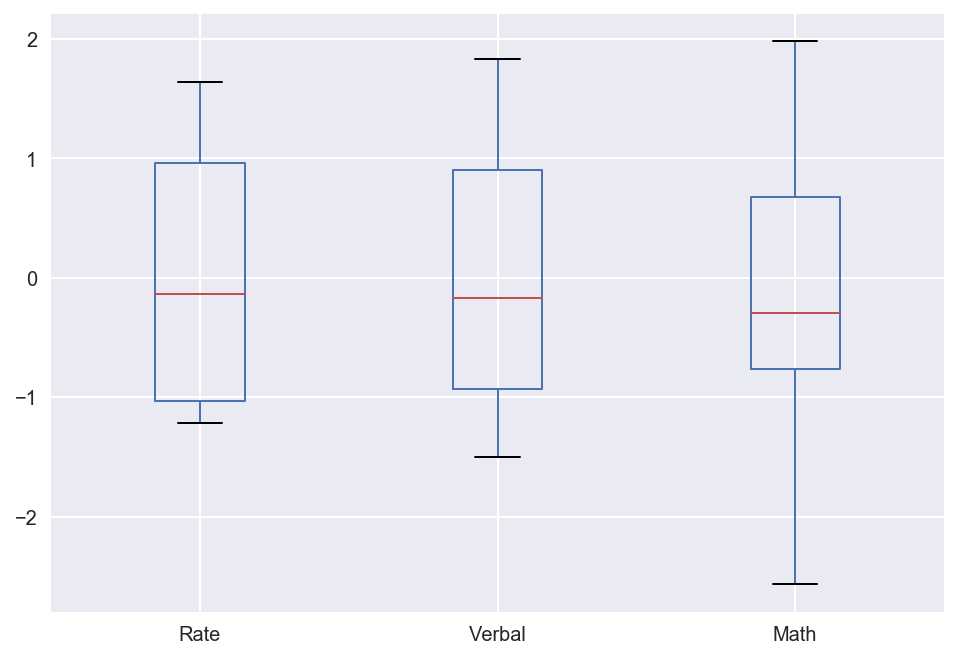

In [10]:
# 4.3 Plot Verbal, Math, and Rate appropriately on the same boxplot chart
# Think about how you might change the variables so that they would make sense on the same
# chart. Explain your rationale for the choices on the chart. You should strive to make the
# chart as intuitive as possible.

# Standardize all of the columns and re-create the boxplot
rate_verbal_math = pandas_read[['Rate','Verbal','Math']]
rate_verbal_math_norm = (rate_verbal_math - rate_verbal_math.mean()) / rate_verbal_math.std()
rate_verbal_math_norm.plot.box()
plt.show()

In [11]:
# 5.1 Find the list of states that have Verbal scores greater than the average of Verbal
# scores across states
avg_verbal = pandas_read.ix[:, 'Verbal'].mean()
print(avg_verbal)
pandas_read.ix[pandas_read.ix[:, 'Verbal'] > avg_verbal, [0,2]].head()

532.0192307692307


,State,Verbal
26,CO,539
27,OH,534
28,MT,539
30,ID,543
31,TN,562


In [12]:
# 5.2 Find the list of states that have Verbal scores greater than the median of Verbal
# scores across states
avg_median = pandas_read.ix[:, 'Verbal'].median()
print(avg_median)
pandas_read.ix[pandas_read.ix[:, 'Verbal'] > avg_median, [0,2]].head()

526.5


,State,Verbal
19,WA,527
26,CO,539
27,OH,534
28,MT,539
29,WV,527


In [13]:
# 5.3 Create a column that is the difference between the Verbal and Math scores
pandas_read['Verbal-Math'] = pandas_read['Verbal'] - pandas_read['Math']
print(pandas_read.head(3))

  State  Rate  Verbal  Math  Verbal-Math
0    CT    82     509   510           -1
1    NJ    81     499   513          -14
2    MA    79     511   515           -4


In [14]:
# 5.4 Create two new DataFrames showing states with the greatest difference between scores

# Your first DataFrame should be the 10 states with the greatest gap between Verbal and Math
# scores where Verbal is greater than Math. It should be sorted appropriately to show the
# ranking of states.
verbal_better = pandas_read.sort_values(by=['Verbal-Math'], ascending=[True]).head(3)

# Your second DataFrame will be the inverse: states with the greatest gap between Verbal and
# Math such that Math is greater than Verbal. Again, this should be sorted appropriately to
# show rank.
math_better = pandas_read.sort_values(by=['Verbal-Math'], ascending=[False]).head(3)

# Print the header of both variables, only showing the top 3 states in each.
cols = ['State', 'Verbal', 'Math', 'Verbal-Math']
print(verbal_better[cols])
print(math_better[cols])

   State  Verbal  Math  Verbal-Math
21    HI     485   515          -30
23    CA     498   517          -19
1     NJ     499   513          -14
   State  Verbal  Math  Verbal-Math
27    OH     534   439           95
50    MS     566   551           15
29    WV     527   512           15


In [15]:
# 6.1 Create the correlation matrix of your variables (excluding State)
pandas_read.corr()

,Rate,Verbal,Math,Verbal-Math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal-Math,-0.101412,0.052600,-0.388219,1.000000


## <font color='blue'>What does the correlation matrix tell you?

There is a strong (>0.8) negative correlation between Verbal and Rate,
for Math and Rate (>= 0.5 and <= 0.8) there is moderate negative correlation.
There is a strong (>0.8) positive correlation between Math and Verbal.

In [16]:
# 6.2 Use pandas' .describe() built-in function on your DataFrame
pandas_read.describe()

,Rate,Verbal,Math,Verbal-Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000



## <font color='blue'>Write up what each of the rows returned by the function indicate

The count row indicates how many values there are for Rate, Verbal and Math
The mean row shows the means
The std row shows the standard deviations
The min row shows the minimum values
The 25%, 50% and 75% rows show the quartile values
The max row shows the maximum values

In [17]:
# 6.3 Assign and print the covariance matrix for the dataset
pandas_read.cov()

,Rate,Verbal,Math,Verbal-Math
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Verbal-Math,-43.552036,27.499623,-219.931373,247.430995


## <font color='blue'>Describe how the covariance matrix is different from the correlation matrix.

Covariance is unbounded and lacks a context when comparing to other covariances.
A correlation is where the covariances have been normalised/adjusted/standardised.

## <font color='blue'>What is the process to convert the covariance into the correlation?

Correlation is the covariance of your variables divided by (or adjusted by, in other words)
each of their standard deviations.

## <font color='blue'>Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

It allows the data sets to be compared more easily.

In [18]:
# 7.1 Load the data using pandas. Does this data require cleaning? Are variables missing?
# How will this affect your approach to EDA on the data?
path_to_file = './drug-use-by-age.csv'
drug_use = pd.read_csv(path_to_file)
#print(drug_use.dtypes)
drug_use.replace('-', np.nan, inplace=True)
drug_use.replace('', np.nan, inplace=True)
#for col in drug_use.columns:
    #print(drug_use[col].isnull().sum())
    #print(drug_use[col])

# Convert age ranges to a single value (where it's a range) and objects to floats
import re
drug_use['age'] = [x.split('-')[0] for x in drug_use['age']]
drug_use['age'] = [int(re.sub('[+]', '', x)) for x in drug_use['age']]
drug_use['cocaine-frequency'] = [float(x) for x in drug_use['cocaine-frequency']]
drug_use['crack-frequency'] = [float(x) for x in drug_use['crack-frequency']]
drug_use['heroin-frequency'] = [float(x) for x in drug_use['heroin-frequency']]
drug_use['inhalant-frequency'] = [float(x) for x in drug_use['inhalant-frequency']]
drug_use['oxycontin-frequency'] = [float(x) for x in drug_use['oxycontin-frequency']]
drug_use['meth-frequency'] = [float(x) for x in drug_use['meth-frequency']]

In [19]:
# 7.2 Do a high-level, initial overview of the data
# Get a feel for what this dataset is all about.

# Use whichever techniques you'd like, including those from the SAT dataset EDA.
# The final response to this question should be a written description of what you infer
# about the dataset.

# Some things to consider doing:

#    Look for relationships between variables and subsets of those variables' values
#    Derive new features from the ones available to help your analysis
#    Visualize everything!

# from https://gist.github.com/rddunlap23
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(12,12))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

In [20]:
use = [x for x in drug_use.columns.values if 'use' in x]
drug_use_use = drug_use[use]
drug_use_use['age'] = drug_use['age']

#Not particularly useful so commented out
#correlation_heat_map(drug_use_use)

C:\Users\trade\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [21]:
frequency = [x for x in drug_use.columns.values if 'frequency' in x]
drug_use_frequency = drug_use[frequency]
drug_use_frequency['age'] = drug_use['age']

#Not particularly useful so commented out
#correlation_heat_map(drug_use_frequency)

C:\Users\trade\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Different types of drugs cannot be compared easily for use


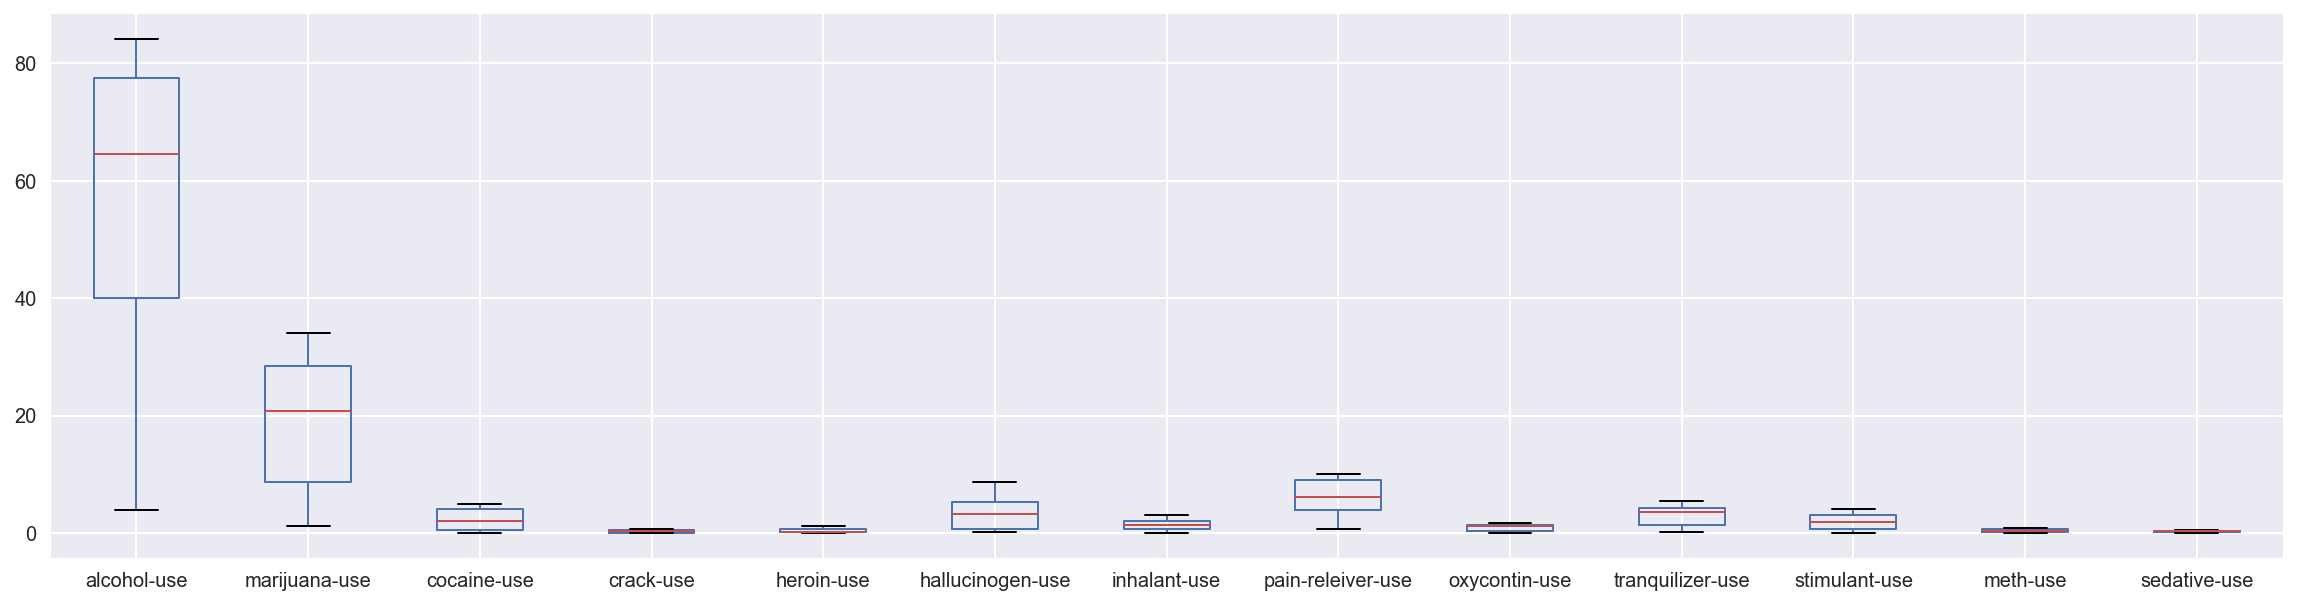

In [22]:
# Do box plots to see if values are standardised

print("Different types of drugs cannot be compared easily for use")
drug_use_use = drug_use_use.drop('age', 1)
drug_use_use.plot.box(figsize=(20,5))
plt.show()

Different types of drugs cannot be compared easily for frequency


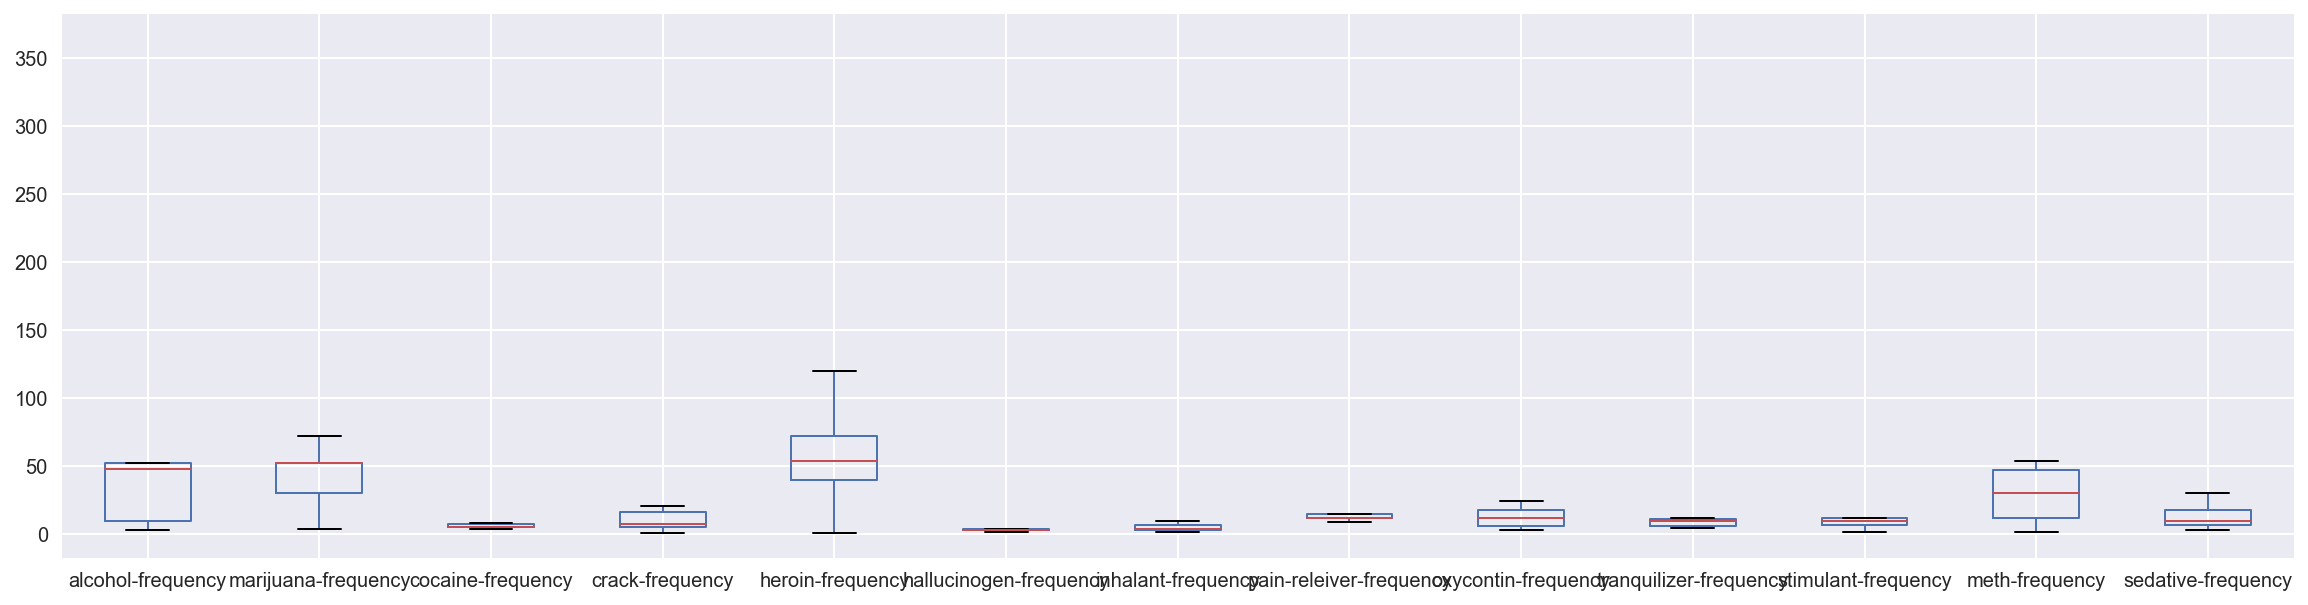

In [23]:
print("Different types of drugs cannot be compared easily for frequency")
drug_use_frequency = drug_use_frequency.drop('age', 1)
drug_use_frequency.plot.box(figsize=(20,5))
plt.show()

In [24]:
### Classifications
# For better comparisons classify drugs by type
'''
'alcohol' depressant (also stimulant) legal
'sedative' depressant legal
'tranquilizer' depressant legal/illegal

'marijuana' stimulant illegal (also legal)
'cocaine' stimulant illegal
'crack' stimulant illegal
'stimulant' stimulant legal/illegal
'meth' stimulant illegal

'heroin' opioid illegal
'pain-releiver' opioid + other legal
'oxycontin' opioid legal

'hallucinogen' hallucinogen ?
'inhalant' hallucinogen ?
'''

# For the purposes of classification I will define the following
drug_use_depressant = ['alcohol','sedative','tranquilizer']
drug_use_stimulant = ['marijuana','cocaine','crack','stimulant','meth']
drug_use_opioid = ['heroin','pain-releiver','oxycontin']
drug_use_hallucinogen = ['hallucinogen','inhalant']

# Also try some legal and illegal classification only where there is no ambiguity
drug_use_legal = ['alcohol','sedative','pain-releiver','oxycontin']
drug_use_illegal = ['cocaine','crack','meth','heroin']

# define functions to use the above to create lists for 'use' and 'frequency'
def add_use(in_list):
    new_list = []
    for l in in_list:
        new_list.append(l+"-use")
    return new_list

def add_frequency(in_list):
    new_list = []
    for l in in_list:
        new_list.append(l+"-frequency")
    return new_list

In [25]:
# create subsets for each of the defined drug types for 'use' and 'frequency'
drug_use_depressant_use = drug_use_use[add_use(drug_use_depressant)]
drug_use_depressant_frequency = drug_use_frequency[add_frequency(drug_use_depressant)]

drug_use_stimulant_use = drug_use_use[add_use(drug_use_stimulant)]
drug_use_stimulant_frequency = drug_use_frequency[add_frequency(drug_use_stimulant)]

drug_use_opioid_use = drug_use_use[add_use(drug_use_opioid)]
drug_use_opioid_frequency = drug_use_frequency[add_frequency(drug_use_opioid)]

drug_use_hallucinogen_use = drug_use_use[add_use(drug_use_hallucinogen)]
drug_use_hallucinogen_frequency = drug_use_frequency[add_frequency(drug_use_hallucinogen)]

drug_use_legal_use = drug_use_use[add_use(drug_use_legal)]
drug_use_legal_frequency = drug_use_frequency[add_frequency(drug_use_legal)]

drug_use_illegal_use = drug_use_use[add_use(drug_use_illegal)]
drug_use_illegal_frequency = drug_use_frequency[add_frequency(drug_use_illegal)]

In [26]:
# Function to plot multi line subplots in rows of 2
def line_graph_subplots(axarr, subset, title, subcat, x):
    # print one line for each value in subset
    for colname, col in subset.iteritems():
        axarr[int(x/2), x%2].plot(drug_use['age'], subset[colname], label=colname)
    axarr[int(x/2), x%2].set_title(title + ' ' + subcat + ' by Age')
    axarr[int(x/2), x%2].set_xlabel('Age')
    axarr[int(x/2), x%2].set_ylabel(subcat)
    axarr[int(x/2), x%2].legend(loc='upper right')
    axarr[int(x/2), x%2].set_xlim(10, 90)

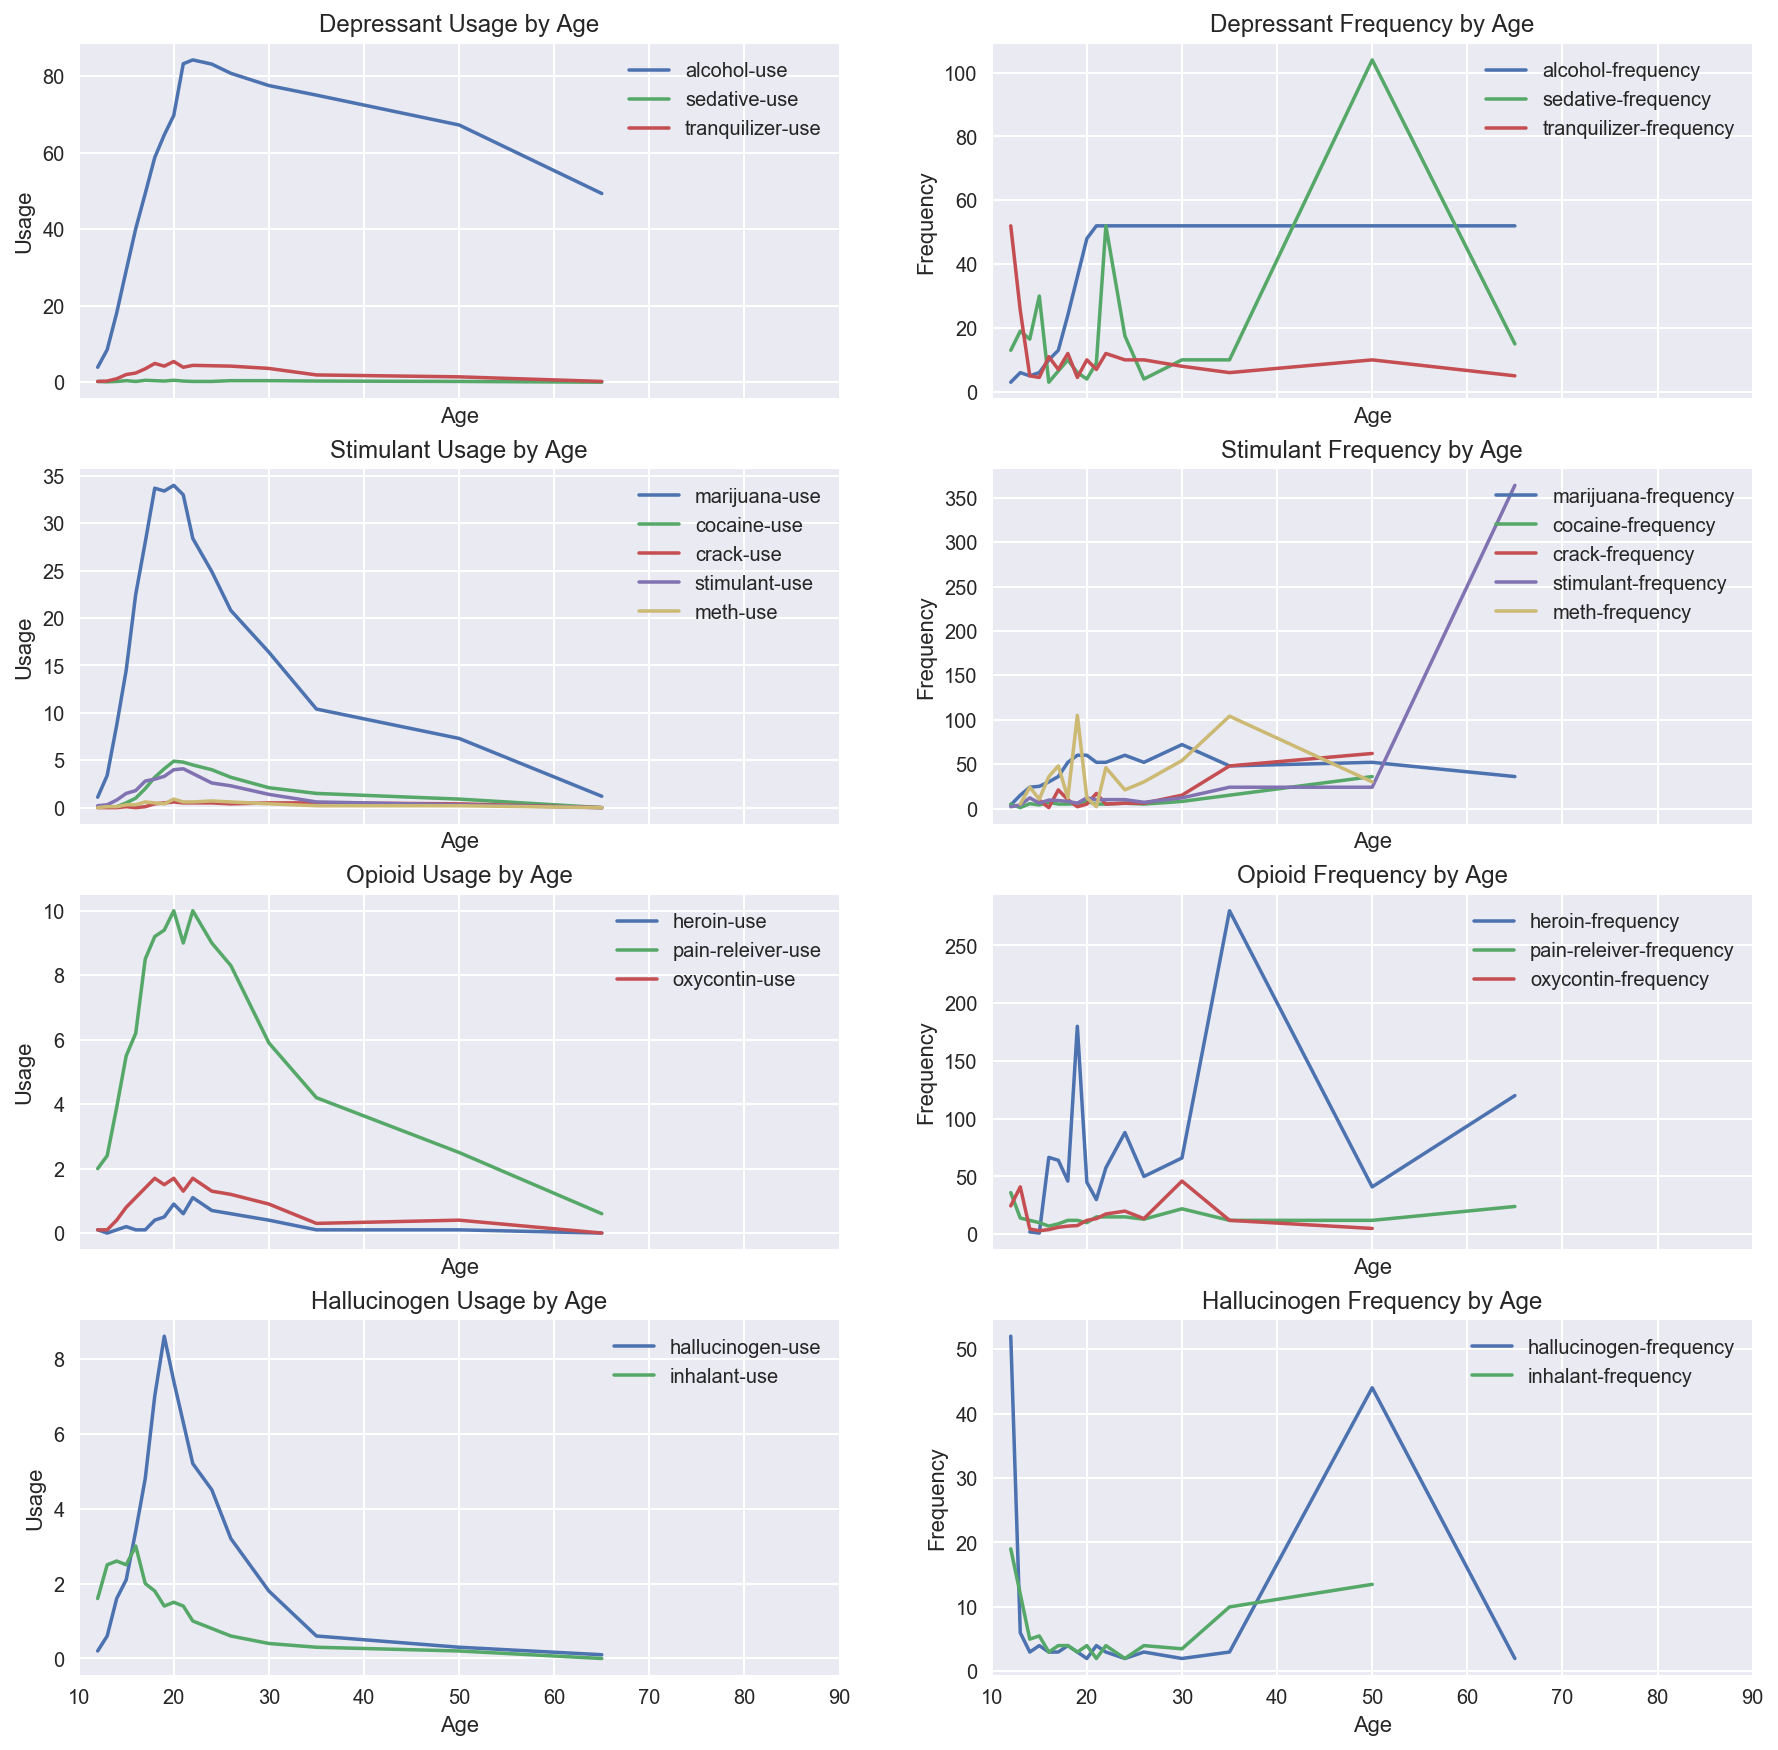

In [27]:
f, axarr = plt.subplots(4, 2, figsize=(15,15), sharex=True)
line_graph_subplots(axarr, drug_use_depressant_use, 'Depressant', 'Usage', 0)
line_graph_subplots(axarr, drug_use_depressant_frequency, 'Depressant', 'Frequency', 1)
line_graph_subplots(axarr, drug_use_stimulant_use, 'Stimulant', 'Usage', 2)
line_graph_subplots(axarr, drug_use_stimulant_frequency, 'Stimulant', 'Frequency', 3)
line_graph_subplots(axarr, drug_use_opioid_use, 'Opioid', 'Usage', 4)
line_graph_subplots(axarr, drug_use_opioid_frequency, 'Opioid', 'Frequency', 5)
line_graph_subplots(axarr, drug_use_hallucinogen_use, 'Hallucinogen', 'Usage', 6)
line_graph_subplots(axarr, drug_use_hallucinogen_frequency, 'Hallucinogen', 'Frequency', 7)
plt.show()

## <font color='blue'>Initial observations drug classifications

Across all 4 of my defined classifications: Depressant, Stimulant, Opioid and Hallucinogen
there is a clear peak of usage around age 20 with usage rapidly declining to age 35 with the
exception of Depressants which reduce much more slowly up to age 65.
Alcohol is clearly the most widely used drug followed by Marijuana as a clear second.

In terms of frequency for these 4 classifications the patterns are more varied.
Alcohol is most frequently used around age 50 and abput half as much in the mid 20s.
Stimulants are the next most frequently used drug around age 50, with stimulants third
around age 65 (this seems odd and may need some more investigation).

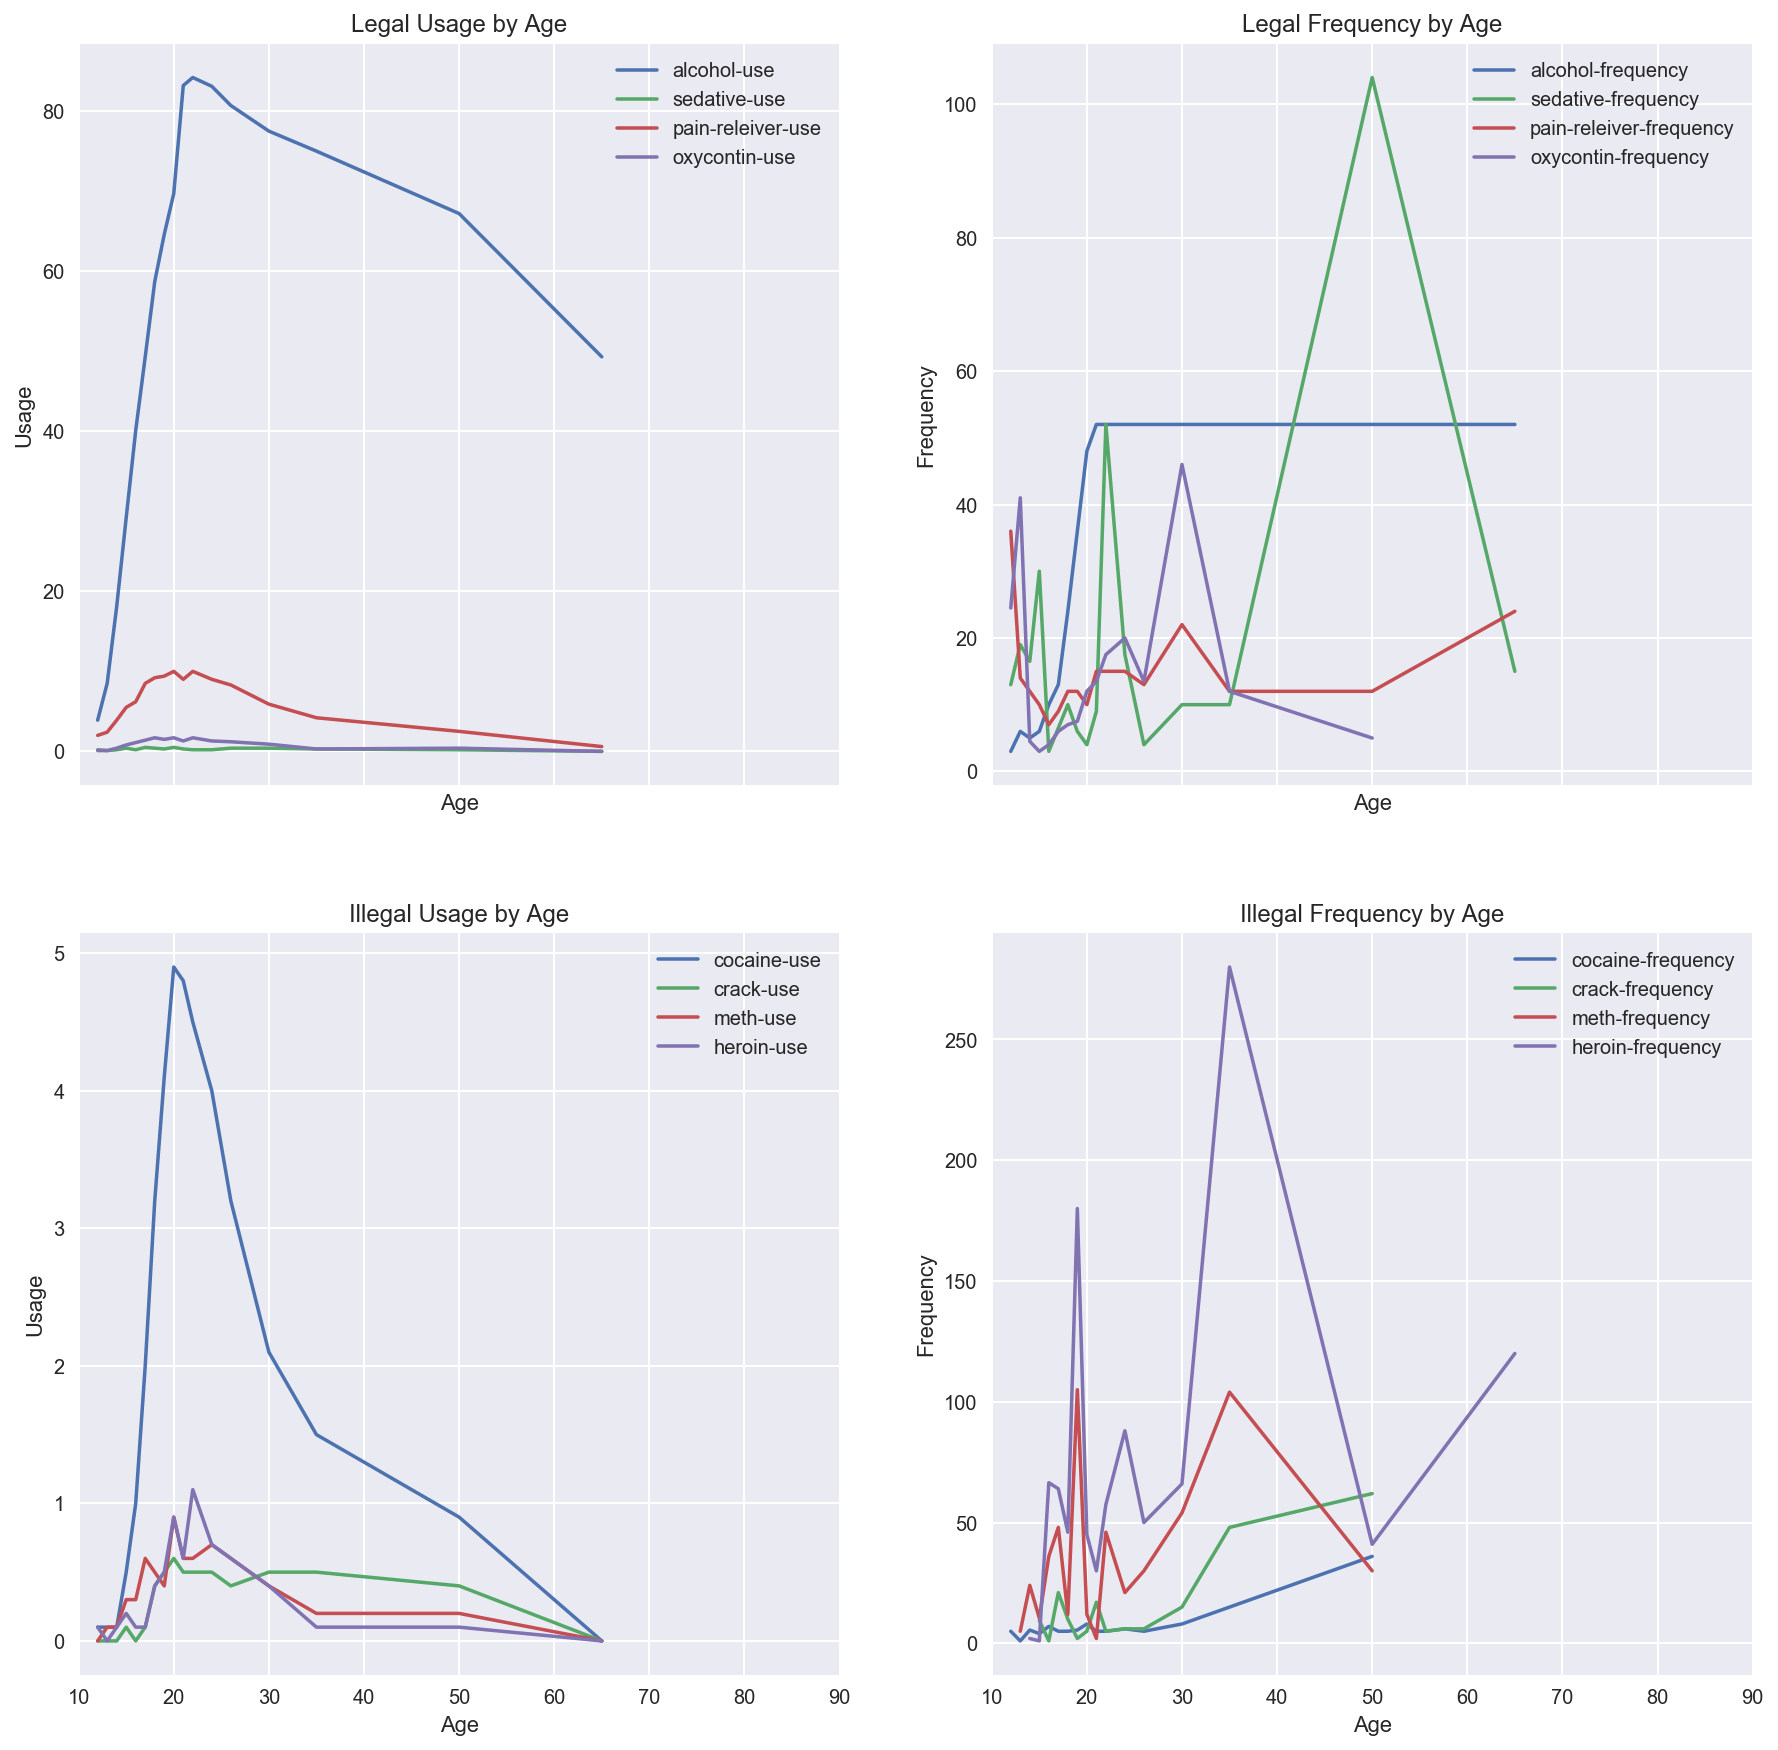

In [28]:
f, axarr = plt.subplots(2, 2, figsize=(15,15), sharex=True)
line_graph_subplots(axarr, drug_use_legal_use, 'Legal', 'Usage', 0)
line_graph_subplots(axarr, drug_use_legal_frequency, 'Legal', 'Frequency', 1)
line_graph_subplots(axarr, drug_use_illegal_use, 'Illegal', 'Usage', 2)
line_graph_subplots(axarr, drug_use_illegal_frequency, 'Illegal', 'Frequency', 3)
plt.show()

### <font color='blue'>Initial observations legal vs illegal

Across the 2 classifications: Legal and Illegal
Alcohol is the clear leader for usage of legal drugs and Cocaine is the clear leader
of illegal drugs both around age 20. Alcohol usage tapers off slowly from age 20 whereas
Cocaine usage falls rapidly. There is a clear peak at age 20 for legal drugs.

In terms of frequency for legal drugs the patterns are quite varied.
Sedatives are clearly the most frequently used legal drug around age 50 with
Alcohol second at around age 20 and interestingly remaining at that level.
Heroin is the most frequently used illegal drug around age 35 with Meth with less
than half the frequency in second.
Illegal drugs have 2 peaks one at around 20 and another at age 35, it might be worth
investigating why there appears to be renewed interest in illegal drugs at age 35.

In [29]:
# Provided by Yen Wei
def redundant_pairs(df):
   pairs_to_drop = set()
   cols = df.columns
   for i in range(0, df.shape[1]):
       for j in range(0, i+1):
           pairs_to_drop.add((cols[i],cols[j]))
   return pairs_to_drop

def get_top_abs_corr(df):
   au_corr = df.corr().abs().unstack()
   labels_to_drop = redundant_pairs(df)
   au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
   return au_corr[:]

# Not particularly useful so comment out
#print('Top Absolute Correlations for "use"')
#print(get_top_abs_corr(drug_use_use).head(10))
#print()
#print('Top Absolute Correlations for "frequency"')
#print(get_top_abs_corr(drug_use_frequency).head(10))

In [30]:
# 7.3 Create a testable hypothesis about this data

# Requirements for the question:

#    Write a specific question you would like to answer with the data (that can be accomplished
#    with EDA).
#    Write a description of the "deliverables": what will you report after testing/examining
#    your hypothesis?
#    Use EDA techniques of your choice, numeric and/or visual, to look into your question.
#    Write up your report on what you have found regarding the hypothesis about the data you
#    came up with.

# Your hypothesis could be on:

#    Difference of group means
#    Correlations between variables
#    Anything else you think is interesting, testable, and meaningful!

# Important notes:

# You should be only doing EDA relevant to your question here. It is easy to go down rabbit
# holes trying to look at every facet of your data, and so we want you to get in the practice
# of specifying a hypothesis you are interested in first and scoping your work to specifically
# answer that question.

# Some of you may want to jump ahead to "modeling" data to answer your question. This is a
# topic addressed in the next project and you should not do this for this project. We
# specifically want you to not do modeling to emphasize the importance of performing EDA
# before you jump to statistical analysis.

## <font color='blue'>Question and Hypothesis

### Is there is a higher level of drug use by the age group 20 - 34 years?

In [31]:
# Test the drug usage of all drugs for 20-34 vs all other ages
drug_use_test = drug_use.copy()
cols_to_use = ['age'] + use
drug_use_test = drug_use_test[cols_to_use]

target = drug_use_test.ix[(drug_use_test.ix[:, 'age'] >= 20) & 
                                (drug_use_test.ix[:, 'age'] <= 34), ]
compare = drug_use_test.ix[(drug_use_test.ix[:, 'age'] < 20) | 
                               (drug_use_test.ix[:, 'age'] > 34), ]

from scipy.stats import ttest_ind
target = target.drop('age', 1)
compare = compare.drop('age', 1)

# Do a t-test for every drug usage
for col in target.columns.values:
    # Use scipy.stats.ttest_ind
    t, p = ttest_ind(target[col].values, compare[col].values, equal_var=False)
    print(col, "ttest_ind: t = %g p = %g" % (t, p))

alcohol-use ttest_ind: t = 4.89296 p = 0.000394905
marijuana-use ttest_ind: t = 2.41022 p = 0.0292833
cocaine-use ttest_ind: t = 4.43302 p = 0.000716693
crack-use ttest_ind: t = 4.50101 p = 0.000629536
heroin-use ttest_ind: t = 5.0226 p = 0.00137317
hallucinogen-use ttest_ind: t = 1.69718 p = 0.111933
inhalant-use ttest_ind: t = -1.86391 p = 0.0827848
pain-releiver-use ttest_ind: t = 3.37027 p = 0.00421856
oxycontin-use ttest_ind: t = 2.84287 p = 0.0123636
tranquilizer-use ttest_ind: t = 4.18407 p = 0.000921754
stimulant-use ttest_ind: t = 2.91364 p = 0.0133195
meth-use ttest_ind: t = 4.34611 p = 0.000911913
sedative-use ttest_ind: t = 1.19751 p = 0.254064


### <font color='blue'>Results
Null hypothesis is that 2 independent samples have identical average (expected) values.
This test assumes that the populations have identical variances by default.

The threshold chosen is 5%

If the p-value is smaller than the threshold then we will reject the null hypothesis of equal averages.

Reject the null hypothesis for the following drugs:
    1. alcohol-use
    2. marijuana-use
    3. cocaine-use
    4. crack-use
    5. heroin-use
    6. pain-releiver-use
    7. oxycontin-use
    8. tranquilizer-use
    9. stimulant-use
    10. meth-use
Accept the null hypothesis for the following drugs:
    1. hallucinogen-use
    2. inhalant-use
    3. sedative-use
    
### <font color='blue'>Conclusions
The overall evidence is that 20-34 year olds are on average the biggest users of drugs, particularly for alcohol and marijuana (refer to previous graphs).

In [1]:
def do_mean_ttest(drug_list, label):
    drug_use_test = drug_use.copy()
    cols_to_use = ['age'] + add_use(drug_list)
    drug_use_test = drug_use_test[cols_to_use]

    target = drug_use_test.ix[(drug_use_test.ix[:, 'age'] >= 20) & 
                              (drug_use_test.ix[:, 'age'] <= 34), ]
    compare = drug_use_test.ix[(drug_use_test.ix[:, 'age'] < 20) | 
                               (drug_use_test.ix[:, 'age'] > 34), ]

    target = target.drop('age', 1)
    compare = compare.drop('age', 1)

    # Use scipy.stats.ttest_ind
    t, p = ttest_ind(target.mean(axis=1).values, compare.mean(axis=1).values, equal_var=False)
    print(label, "ttest_ind: t = %g p = %g" % (t, p))

In [33]:
# Test the drug usage of the mean values for all depressant drugs for 20-34 vs all other ages
do_mean_ttest(drug_use_depressant, "depressant")

# Test the drug usage of the mean values for all depressant drugs for 20-34 vs all other ages
do_mean_ttest(drug_use_stimulant, "stimulant")

# Test the drug usage of the mean values for all depressant drugs for 20-34 vs all other ages
do_mean_ttest(drug_use_opioid, "opioid")

# Test the drug usage of the mean values for all depressant drugs for 20-34 vs all other ages
do_mean_ttest(drug_use_hallucinogen, "hallucinogen")

depressant ttest_ind: t = 5.04398 p = 0.000340027
stimulant ttest_ind: t = 2.76798 p = 0.0145739
opioid ttest_ind: t = 3.50195 p = 0.00321322
hallucinogen ttest_ind: t = 0.969949 p = 0.349194


### <font color='blue'>Results
Reject the null hypothesis for the following drug classifications:
    1. depressant-use
    2. stimulant-use
    3. opioid-use
    4. crack-use
    5. heroin-use
Accept the null hypothesis for the following classifications:
    1. hallucinogen-use
    
### <font color='blue'>Conclusions
When we group together drugs by classification and average the usage the overall evidence still shows us that 20-34 year olds are on average the biggest users of drugs, particularly for depressants and opioids.

In [34]:
# Test the drug usage of the mean values for all legal drugs for 20-34 vs all other ages
do_mean_ttest(drug_use_legal, "legal")

# Test the drug usage of the mean values for all illegal drugs for 20-34 vs all other ages
do_mean_ttest(drug_use_illegal, "illegal")

legal ttest_ind: t = 5.12916 p = 0.000276838
illegal ttest_ind: t = 4.91411 p = 0.000297623


### <font color='blue'>Results
Reject the null hypothesis for the following drug classifications:
    1. legal-use
    2. illegal-use
    
### <font color='blue'>Conclusions
When we group together drugs by legality and average the usage the overall evidence still shows us that 20-34 year olds are on average the biggest users of drugs.

In [35]:
# 8. Introduction to dealing with outliers

# Outliers are an interesting problem in statistics, in that there is not an agreed upon
# best way to define them. Subjectivity in selecting and analyzing data is a problem that
# will recur throughout the course.

#    1. Pull out the rate variable from the sat dataset.
rate = pandas_read['Rate']

In [36]:
#    2. Are there outliers in the dataset? Define, in words, how you numerically define outliers.
# An outlier is an element of a data set that distinctly stands out from the rest of the data.#    Print out the outliers in the dataset.

# Use Tukey method as suggested by Kinah, first get 25th and 75th percentiles
percentile_bands = np.percentile(pandas_read['Rate'], [25,75])

# Calculate interquartile range
IQR = percentile_bands[1] - percentile_bands[0]

# Calculate lower and upper limits
lower_limit = percentile_bands[0] - (1.5 * IQR)
upper_limit = percentile_bands[1] + (1.5 * IQR)

print("Lower limit:", lower_limit, "Upper limit:", upper_limit)
print("With these limits no outliers will be removed\n")

Lower limit: -72.75 Upper limit: 145.25
With these limits no outliers will be removed



In [37]:
# Alternatively define outliers as more than 2 standard deviations from the mean so as
# to try and actually get some outliers, first calculate the lower and upper percentiles
percentile_bands = np.percentile(pandas_read['Rate'], [2.5,97.5])
lower_limit = percentile_bands[0]
upper_limit = percentile_bands[1]
print("Lower limit:", lower_limit, "Upper limit:", upper_limit)
print("With these limits we should find some outliers\n")

outliers_removed = pandas_read.copy()
outliers_removed = outliers_removed['Rate']
outliers = outliers_removed[(outliers_removed <= lower_limit) |
                            (outliers_removed >= upper_limit)]

#    3. Print out the outliers in the dataset.
print("Outlier values")
print(outliers.values)

Lower limit: 4.0 Upper limit: 80.45
With these limits we should find some outliers

Outlier values
[82 81  4  4  4]


In [38]:
#    4. Remove the outliers from the dataset.
print("Number of values before outliers removed:", outliers_removed.shape[0])
outliers_removed = outliers_removed[(outliers_removed > lower_limit) &
                                    (outliers_removed < upper_limit)]
print("Number of values after outliers removed:", outliers_removed.shape[0])

#    5. Compare the mean, median, and standard deviation of the "cleaned" data without
#    outliers to the original. What is different about them and why?

print("\nOriginal dataset mean, median, and standard deviation")
print("mean:", np.mean(rate), "median:", np.median(rate), "std:", np.std(rate),"\n")
print("Cleaned dataset mean, median, and standard deviation")
print("mean:", np.mean(outliers_removed), "median:", np.median(outliers_removed), 
      "std:", np.std(outliers_removed))

# The mean and median are only slightly different in this case however the standard deviation
# has reduced as we would expect when we remove some of the variation.

Number of values before outliers removed: 52
Number of values after outliers removed: 47

Original dataset mean, median, and standard deviation
mean: 37.15384615384615 median: 33.5 std: 27.03799649452359 

Cleaned dataset mean, median, and standard deviation
mean: 37.38297872340426 median: 34.0 std: 25.591349262683547


In [39]:
# 9.1 Calculate the spearman correlation of sat Verbal and Math
pandas_read['Verbal'].corr(pandas_read['Math'], method='spearman')

0.90520488479402839

In [40]:
#    How does the spearman correlation compare to the pearson correlation?
pandas_read['Verbal'].corr(pandas_read['Math'], method='pearson')
#    They agree very closely, therefore we can say there is a high correlation between
#    Verbal and Math scores, that is high Verbal scores tend to indicate there will be
#    high Math scores and low Verbal scores tend to indicate there will be low Math scores

#    Describe clearly in words the process of calculating the spearman rank correlation.
#        Hint: the word "rank" is in the name of the process for a reason!

# Spearman rank correlation is a nonparametric measure of rank correlation (statistical
# dependence between the ranking of two variables)
# To calculate Spearman’s rank correlation we need to determine the rank for each of the
# Verbal scores and each of the Math scores, there are n scores.
# Calculate the absolute difference between the two sets of ranks, call these values d.
# Square all the values calculated above (d ** 2) and sum these squares.
# Then use the formula 1 - (6 * sum of (d ** 2)) / n (n ** 2 - 1)

0.89987085254442922

In [41]:
# 9.2 Percentile scoring

# Look up percentile scoring of data. In other words, the conversion of numeric data to their
# equivalent percentile scores.

# http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

#Can choose which percentile bands to calculate using numpy.percentile
#percentile_bands = np.percentile(pandas_read['Rate'], [10,20,30,40,50,60,70,80,90])

#Another way to do this is using pandas.qcut
#pandas_read['Percentiles'] = [x*10 for x in (pd.qcut(pandas_read['Rate'], 10, labels=False))]

#    Convert Rate to percentiles in the sat scores as a new column.
pandas_read['Percentiles'] = [stats.percentileofscore(pandas_read['Rate'], x)
                              for x in pandas_read['Rate']]

#    Show the percentile of California in Rate.
print(pandas_read[pandas_read['State'] == 'CA']['Percentiles'])

#    How is percentile related to the spearman rank correlation?

#    The Spearman rank correlation shows the statistical dependence of two variables
#    based on their rank

#    The percentile shows the relative position of a single variable score in relation
#    to the entire set of the variable's values.

23    56.730769
Name: Percentiles, dtype: float64


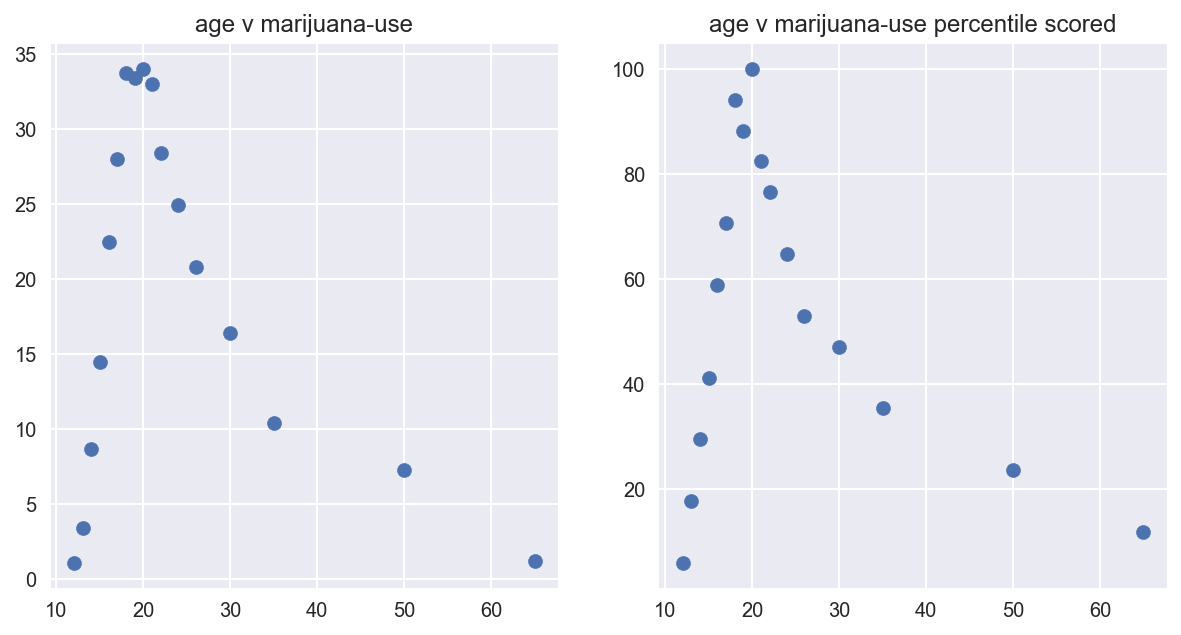

In [42]:
# 9.3 Percentiles and outliers

#    Why might percentile scoring be useful for dealing with outliers?

# When using something like the Tukey method we use percentile values
# We start with calculating the Quartile 1 (25h percentile) and Quartile 3 (75th percentile).
# Then we calculate the IQR i.e. (Quartile 3 - Quartile 1)
# With Tukey’s method, outliers are:
#     values below (Quartile 1) – (1.5 × IQR)
#     values above (Quartile 3) + (1.5 × IQR)

#    Plot the same variable but percentile scored.
my_variable = [stats.percentileofscore(drug_use['marijuana-use'], x)
                              for x in drug_use['marijuana-use']]

f, axarr = plt.subplots(1, 2, figsize=(10,5))
axarr[0].scatter(drug_use['age'], drug_use['marijuana-use'])
axarr[0].set_title('age v marijuana-use')
axarr[1].scatter(drug_use['age'], my_variable)
axarr[1].set_title('age v marijuana-use percentile scored')
plt.show()

#    Describe the effect, visually, of converting raw scores to percentile.

# Plotting raw scores results in the y values being spread in uneven vertical distances
# from each other (depending on the data) whereas converting raw scores to percentile values
# results in the y values being spread in equal vertical distances from each other.